In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [3]:
warnings.filterwarnings('ignore')
sns.set_theme()

In [4]:
train_df = pd.read_csv('./train.csv')
train_df.head()

,bidder_id,payment_account,address,outcome
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2013 entries, 0 to 2012
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bidder_id        2013 non-null   object 
 1   payment_account  2013 non-null   object 
 2   address          2013 non-null   object 
 3   outcome          2013 non-null   float64
dtypes: float64(1), object(3)
memory usage: 63.0+ KB


In [6]:
train_df.describe(include=np.number)

,outcome
count,2013.000000
mean,0.051167
std,0.220394
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [7]:
train_df.describe(include=object)

,bidder_id,payment_account,address
count,2013,2013,2013
unique,2013,2013,2013
top,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4
freq,1,1,1


In [8]:
train_df.isna().sum().sum()

0

In [9]:
train_df.shape

(2013, 4)

<AxesSubplot:xlabel='outcome', ylabel='count'>

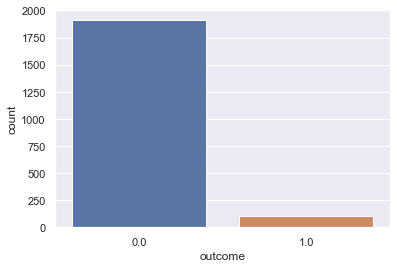

In [10]:
sns.countplot(data=train_df, x='outcome')

In [11]:
bid_df = pd.read_csv('./bids.csv')
bid_df.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3


In [12]:
def get_sameness(series):
    """
    Computes sameness. 
    """
    if len(series) == 0:
        return 0.3
    vc = series.value_counts()
    p_vc = vc / len(series)
    res = np.dot(vc.values, p_vc.values)
    return res / len(series)

In [13]:
get_sameness(bid_df[bid_df["bidder_id"] == "1c5f4fc669099bfbfac515cd26997bd12ruaj"]["merchandise"])

1.0

In [18]:
def preprocess_data(df, bid_df):

    bidder_id_count = df["bidder_id"].rename("bidder_id_count")
    bidder_id_count = bidder_id_count.map(bid_df["bidder_id"].value_counts())
    sameness = {}
    col_to_iter = ["auction", "merchandise", "device", "country", "ip", "url"]

        
    for col in col_to_iter:
        sameness[col] = np.zeros(len(df), dtype=object)
        i = 0
        for bidder_id in df["bidder_id"]:
            print(col, i)
            sameness[col][i] = get_sameness(bid_df[bid_df["bidder_id"] == bidder_id][col])
            i += 1
        print(sameness[col])
        
    sameness = pd.DataFrame(sameness)
    bidder_id_count = pd.DataFrame(bidder_id_count)
    sameness = pd.concat([sameness, bidder_id_count], axis=1)
    df = pd.concat([df, sameness], axis=1)
    df.drop(columns=['bidder_id', 'payment_account', 'address'], axis=1, inplace=True)
    return df

In [20]:
if os.path.exists('./preprocessed_train.csv'):
    train_df = pd.read_csv('./preprocessed_train.csv')
else:
    train_df = preprocess_data(train_df, bid_df)
    train_df.to_csv('./preprocessed_train.csv', sep=',', index=False)

train_df.head()

,outcome,auction,merchandise,device,country,ip,url,bidder_id_count
0,0.0,0.065972,1.0,0.118056,0.354167,0.065972,1.000000,24.0
1,0.0,1.000000,1.0,0.555556,1.000000,0.333333,0.555556,3.0
2,0.0,0.250000,1.0,0.625000,1.000000,0.250000,0.625000,4.0
3,0.0,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.0
4,0.0,0.121498,1.0,0.049906,0.987180,0.013611,0.127076,155.0


In [ ]:
train_df.head()

In [21]:
train_df.isna().sum()

outcome             0
auction             0
merchandise         0
device              0
country             0
ip                  0
url                 0
bidder_id_count    29
dtype: int64

In [22]:
train_df['bidder_id_count'].fillna(train_df['bidder_id_count'].mean(), inplace=True)
bid_df.drop(columns=['bid_id', 'time'], inplace=True, axis=1)
bid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7656334 entries, 0 to 7656333
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   bidder_id    object
 1   auction      object
 2   merchandise  object
 3   device       object
 4   country      object
 5   ip           object
 6   url          object
dtypes: object(7)
memory usage: 408.9+ MB


In [23]:
bid_df.describe()

,bidder_id,auction,merchandise,device,country,ip,url
count,7656334,7656334,7656334,7656334,7647475,7656334,7656334
unique,6614,15051,10,7351,199,2303991,1786351
top,f5b2bbad20d1d7ded3ed960393bec0f40u6hn,jqx39,mobile,phone4,in,37.95.134.218,vasstdc27m7nks3
freq,515033,537347,2126587,706573,1788731,61203,3499409


In [24]:
bid_df.isna().sum()

bidder_id         0
auction           0
merchandise       0
device            0
country        8859
ip                0
url               0
dtype: int64

In [25]:
bid_df.shape

test_df = pd.read_csv('./test.csv')
test_df.head()

,bidder_id,payment_account,address
0,49bb5a3c944b8fc337981cc7a9ccae41u31d7,a3d2de7675556553a5f08e4c88d2c228htx90,5d9fa1b71f992e7c7a106ce4b07a0a754le7c
1,a921612b85a1494456e74c09393ccb65ylp4y,a3d2de7675556553a5f08e4c88d2c228rs17i,a3d2de7675556553a5f08e4c88d2c228klidn
2,6b601e72a4d264dab9ace9d7b229b47479v6i,925381cce086b8cc9594eee1c77edf665zjpl,a3d2de7675556553a5f08e4c88d2c228aght0
3,eaf0ed0afc9689779417274b4791726cn5udi,a3d2de7675556553a5f08e4c88d2c228nclv5,b5714de1fd69d4a0d2e39d59e53fe9e15vwat
4,cdecd8d02ed8c6037e38042c7745f688mx5sf,a3d2de7675556553a5f08e4c88d2c228dtdkd,c3b363a3c3b838d58c85acf0fc9964cb4pnfa


In [26]:
bidder_id = test_df['bidder_id']
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4700 entries, 0 to 4699
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   bidder_id        4700 non-null   object
 1   payment_account  4700 non-null   object
 2   address          4700 non-null   object
dtypes: object(3)
memory usage: 110.3+ KB


In [27]:
test_df.describe()

,bidder_id,payment_account,address
count,4700,4700,4700
unique,4700,4700,4700
top,49bb5a3c944b8fc337981cc7a9ccae41u31d7,a3d2de7675556553a5f08e4c88d2c228htx90,5d9fa1b71f992e7c7a106ce4b07a0a754le7c
freq,1,1,1


In [28]:
test_df.isna().sum()

bidder_id          0
payment_account    0
address            0
dtype: int64

In [29]:
test_df.shape

(4700, 3)

In [32]:
if os.path.exists('./preprocessed_test.csv'):
    test_df = pd.read_csv('./preprocessed_test.csv')
else:
    test_df = preprocess_data(test_df, bid_df)
    test_df.to_csv('./preprocessed_test.csv', sep=',', index=False)

test_df.isna().sum()
test_df.head()

,auction,merchandise,device,country,ip,url,bidder_id_count
0,0.375000,1.0,0.625000,0.375000,0.250000,0.375000,4.0
1,0.555556,1.0,0.333333,0.555556,0.555556,1.000000,3.0
2,0.079585,1.0,0.301038,0.404844,0.363322,0.640138,17.0
3,0.027575,1.0,0.031958,0.278488,0.010226,0.197042,148.0
4,0.054820,1.0,0.066163,0.773157,0.066163,1.000000,23.0


In [33]:
test_df["bidder_id_count"].fillna(test_df["bidder_id_count"].mean(), inplace=True)

In [34]:
X = train_df.drop(columns=['outcome'], axis=1)
Y = train_df['outcome']
X.shape, Y.shape

((2013, 7), (2013,))

In [35]:
X_test = test_df
X_test.shape

(4700, 7)

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression           # Logistic Regression
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report
from sklearn.model_selection import cross_val_score

model_gbc = GradientBoostingClassifier(max_depth=10, n_estimators=500, random_state=42)
model_gbc.fit(X, Y)
pred_proba_gbc = model_gbc.predict_proba(X)[:,1]
print(classification_report(Y, model_gbc.predict(X)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1910
         1.0       1.00      0.95      0.98       103

    accuracy                           1.00      2013
   macro avg       1.00      0.98      0.99      2013
weighted avg       1.00      1.00      1.00      2013



In [37]:
Y_pred = model_gbc.predict_proba(X_test)[:,1]
solution = pd.DataFrame({"bidder_id": bidder_id, "prediction": Y_pred})


In [38]:
solution.to_csv("result.csv", sep=",", index=False)